# GRUPO 7. BIG DATA. PREDICCIÓN DATOS CALIDAD DEL AIRE Y CLIMATOLÓGICOS
---



#  1.Carga de los datos


In [1]:
# Cargamos las librerias que vamos a usar.
import pandas as pd
import datetime
#from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
# Carga dataframe
datosHistoricos = pd.read_csv('datosHistoricosCalidadAire.csv',sep=';')

In [3]:
datosHistoricos.head()

,id,id_merge,fechahora,fecha,hora,estacion_real,magnitud,descripcion_magnitud,factor_calculo_horario,ica_parcial,valor_magnitud,provincia,municipio,dia_de_la_semana
0,2018-1-1-00:00-28102001-1,2018-1-1-00:00-28102001,2018-1-1 00:00,2018-1-1,1,28102001,1,Dióxido de azufre,0.286,0.572,2.0,28,102,0
1,2018-1-1-01:00-28102001-1,2018-1-1-01:00-28102001,2018-1-1 01:00,2018-1-1,2,28102001,1,Dióxido de azufre,0.286,0.572,2.0,28,102,0
2,2018-1-1-02:00-28102001-1,2018-1-1-02:00-28102001,2018-1-1 02:00,2018-1-1,3,28102001,1,Dióxido de azufre,0.286,0.572,2.0,28,102,0
3,2018-1-1-03:00-28102001-1,2018-1-1-03:00-28102001,2018-1-1 03:00,2018-1-1,4,28102001,1,Dióxido de azufre,0.286,0.572,2.0,28,102,0
4,2018-1-1-04:00-28102001-1,2018-1-1-04:00-28102001,2018-1-1 04:00,2018-1-1,5,28102001,1,Dióxido de azufre,0.286,0.572,2.0,28,102,0


**VISUALIZACIÓN DATAFRAME**

In [4]:
# datosHistoricos la informacion del dataframe
datosHistoricos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595387 entries, 0 to 1595386
Data columns (total 14 columns):
id                        1595387 non-null object
id_merge                  1595387 non-null object
fechahora                 1595387 non-null object
fecha                     1595387 non-null object
hora                      1595387 non-null int64
estacion_real             1595387 non-null int64
magnitud                  1595387 non-null int64
descripcion_magnitud      1595387 non-null object
factor_calculo_horario    1595387 non-null float64
ica_parcial               1595387 non-null float64
valor_magnitud            1595387 non-null float64
provincia                 1595387 non-null int64
municipio                 1595387 non-null int64
dia_de_la_semana          1595387 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 170.4+ MB


In [5]:
# Consultamos las columnas.
datosHistoricos.columns

Index(['id', 'id_merge', 'fechahora', 'fecha', 'hora', 'estacion_real',
       'magnitud', 'descripcion_magnitud', 'factor_calculo_horario',
       'ica_parcial', 'valor_magnitud', 'provincia', 'municipio',
       'dia_de_la_semana'],
      dtype='object')

In [6]:
# Consultamos el tipo de datos de cada columna.
datosHistoricos.dtypes

id                         object
id_merge                   object
fechahora                  object
fecha                      object
hora                        int64
estacion_real               int64
magnitud                    int64
descripcion_magnitud       object
factor_calculo_horario    float64
ica_parcial               float64
valor_magnitud            float64
provincia                   int64
municipio                   int64
dia_de_la_semana            int64
dtype: object

In [7]:
#Consultamos Valores faltantes
datosHistoricos.isnull().sum()

id                        0
id_merge                  0
fechahora                 0
fecha                     0
hora                      0
estacion_real             0
magnitud                  0
descripcion_magnitud      0
factor_calculo_horario    0
ica_parcial               0
valor_magnitud            0
provincia                 0
municipio                 0
dia_de_la_semana          0
dtype: int64

In [8]:
#Eliminamos valores Nulos
datosHistoricos = datosHistoricos.dropna()
datosHistoricos.isnull().sum()

id                        0
id_merge                  0
fechahora                 0
fecha                     0
hora                      0
estacion_real             0
magnitud                  0
descripcion_magnitud      0
factor_calculo_horario    0
ica_parcial               0
valor_magnitud            0
provincia                 0
municipio                 0
dia_de_la_semana          0
dtype: int64

In [9]:
# Convertimos fecha en datetime
#df = datos_filtrados2020.loc[:, ["fecha","ica_parcial"]]
datosHistoricos['fecha2'] = pd.DatetimeIndex(datosHistoricos['fecha'])
datosHistoricos.dtypes
# Creamos columnas con el mes, dia y año
datosHistoricos['mes'] = datosHistoricos['fecha2'].dt.month
datosHistoricos['dia'] = datosHistoricos['fecha2'].dt.day
datosHistoricos['año'] = datosHistoricos['fecha2'].dt.year
datosHistoricos

,id,id_merge,fechahora,fecha,hora,estacion_real,magnitud,descripcion_magnitud,factor_calculo_horario,ica_parcial,valor_magnitud,provincia,municipio,dia_de_la_semana,fecha2,mes,dia,año
0,2018-1-1-00:00-28102001-1,2018-1-1-00:00-28102001,2018-1-1 00:00,2018-1-1,1,28102001,1,Dióxido de azufre,0.286,0.57200,2.00,28,102,0,2018-01-01,1,1,2018
1,2018-1-1-01:00-28102001-1,2018-1-1-01:00-28102001,2018-1-1 01:00,2018-1-1,2,28102001,1,Dióxido de azufre,0.286,0.57200,2.00,28,102,0,2018-01-01,1,1,2018
2,2018-1-1-02:00-28102001-1,2018-1-1-02:00-28102001,2018-1-1 02:00,2018-1-1,3,28102001,1,Dióxido de azufre,0.286,0.57200,2.00,28,102,0,2018-01-01,1,1,2018
3,2018-1-1-03:00-28102001-1,2018-1-1-03:00-28102001,2018-1-1 03:00,2018-1-1,4,28102001,1,Dióxido de azufre,0.286,0.57200,2.00,28,102,0,2018-01-01,1,1,2018
4,2018-1-1-04:00-28102001-1,2018-1-1-04:00-28102001,2018-1-1 04:00,2018-1-1,5,28102001,1,Dióxido de azufre,0.286,0.57200,2.00,28,102,0,2018-01-01,1,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595382,2020-5-31-19:00-28079060-14,2020-5-31-19:00-28079060,2020-5-31 19:00,2020-5-31,20,28079060,14,Ozono,0.556,51.55232,92.72,28,79,6,2020-05-31,5,31,2020
1595383,2020-5-31-20:00-28079060-14,2020-5-31-20:00-28079060,2020-5-31 20:00,2020-5-31,21,28079060,14,Ozono,0.556,45.32512,81.52,28,79,6,2020-05-31,5,31,2020
1595384,2020-5-31-21:00-28079060-14,2020-5-31-21:00-28079060,2020-5-31 21:00,2020-5-31,22,28079060,14,Ozono,0.556,43.16228,77.63,28,79,6,2020-05-31,5,31,2020
1595385,2020-5-31-22:00-28079060-14,2020-5-31-22:00-28079060,2020-5-31 22:00,2020-5-31,23,28079060,14,Ozono,0.556,46.16468,83.03,28,79,6,2020-05-31,5,31,2020


In [10]:
datosHistoricos.head()
datosHistoricos.groupby(['mes', 'año']).mean()[['ica_parcial']]

ica_parcial
mes año              
1   2018    13.827448
    2019    15.403698
    2020    14.666241
2   2018    14.600170
    2019    17.257522
    2020    14.960221
3   2018    14.649840
    2019    16.433565
    2020    13.768456
4   2018    16.344426
    2019    15.879776
    2020    12.319503
5   2018    16.244732
    2019    15.516438
    2020    13.815771

Text(0.5, 1.0, 'ICA PROMEDIO MES')

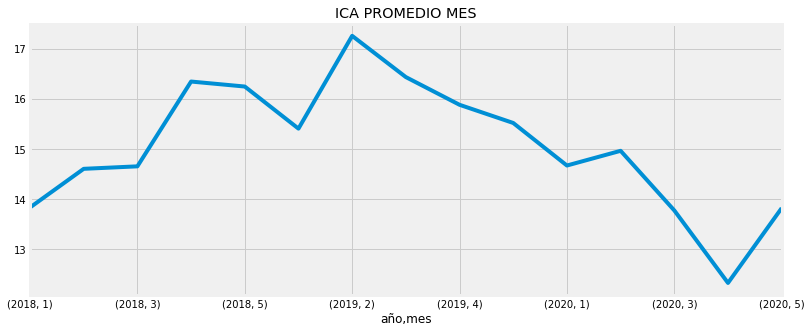

In [11]:
#dd2018=datos_filtrados.loc[datos_filtrados.loc[:, 'año'] == '2018']
#dd2019=datos_filtrados.loc[datos_filtrados.loc[:, 'año'] == '2019']
#dd2020=datos_filtrados.loc[datos_filtrados.loc[:, 'año'] == '2020']

#dd2020 = datos_filtrados2020[datos_filtrados2020['año'].isin([2019]) ]
# Mostramos valores medios por meses de ica parcial
#dd2020.groupby(dd2020['fecha2'].dd2020.strftime('%B'))['ica_parcial'].mean().sort_values()
dategroup=datosHistoricos.groupby(['año' ,'mes']).mean()
plt.figure(figsize=(12,5))
dategroup['ica_parcial'].plot(x=datosHistoricos.fecha)
plt.title('ICA PROMEDIO MES')


In [12]:
datosHistoricos.loc[:, (datosHistoricos == 0).all()]
datos_filtrados =datosHistoricos[datosHistoricos['ica_parcial'] !=0]

In [13]:
datos_filtrados.head()

,id,id_merge,fechahora,fecha,hora,estacion_real,magnitud,descripcion_magnitud,factor_calculo_horario,ica_parcial,valor_magnitud,provincia,municipio,dia_de_la_semana,fecha2,mes,dia,año
0,2018-1-1-00:00-28102001-1,2018-1-1-00:00-28102001,2018-1-1 00:00,2018-1-1,1,28102001,1,Dióxido de azufre,0.286,0.572,2.0,28,102,0,2018-01-01,1,1,2018
1,2018-1-1-01:00-28102001-1,2018-1-1-01:00-28102001,2018-1-1 01:00,2018-1-1,2,28102001,1,Dióxido de azufre,0.286,0.572,2.0,28,102,0,2018-01-01,1,1,2018
2,2018-1-1-02:00-28102001-1,2018-1-1-02:00-28102001,2018-1-1 02:00,2018-1-1,3,28102001,1,Dióxido de azufre,0.286,0.572,2.0,28,102,0,2018-01-01,1,1,2018
3,2018-1-1-03:00-28102001-1,2018-1-1-03:00-28102001,2018-1-1 03:00,2018-1-1,4,28102001,1,Dióxido de azufre,0.286,0.572,2.0,28,102,0,2018-01-01,1,1,2018
4,2018-1-1-04:00-28102001-1,2018-1-1-04:00-28102001,2018-1-1 04:00,2018-1-1,5,28102001,1,Dióxido de azufre,0.286,0.572,2.0,28,102,0,2018-01-01,1,1,2018


# 2.Visualización de los datos

## a) ICA PARCIAL

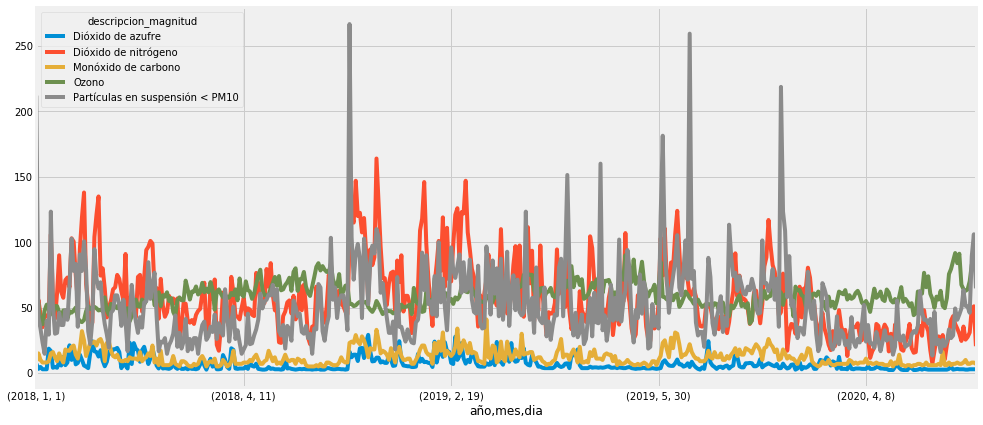

In [14]:
# Suma de ICA agrupado por Hora y Magnitudes 
fig, ax = plt.subplots(figsize=(15,7))
datos_filtrados.groupby(['año','mes','dia','descripcion_magnitud']).max()['ica_parcial'].unstack().plot(ax=ax)

In [15]:
#Datos 2018
datos_filtrados2018 =datos_filtrados[datos_filtrados['año'] == 2018]

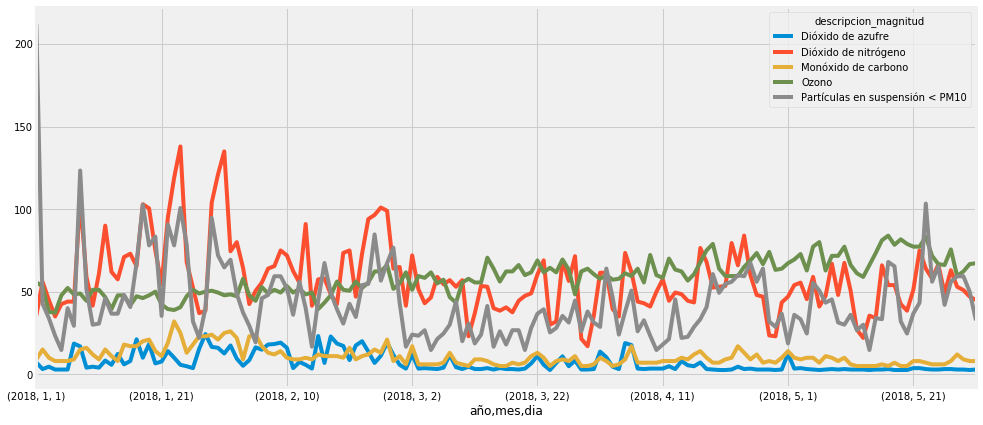

In [16]:
# Suma de ICA agrupado por Hora y Magnitudes 
fig, ax = plt.subplots(figsize=(15,7))
datos_filtrados2018.groupby(['año','mes','dia','descripcion_magnitud']).max()['ica_parcial'].unstack().plot(ax=ax)

In [17]:
#Datos 2019
datos_filtrados2019 =datos_filtrados[datos_filtrados['año'] == 2019]

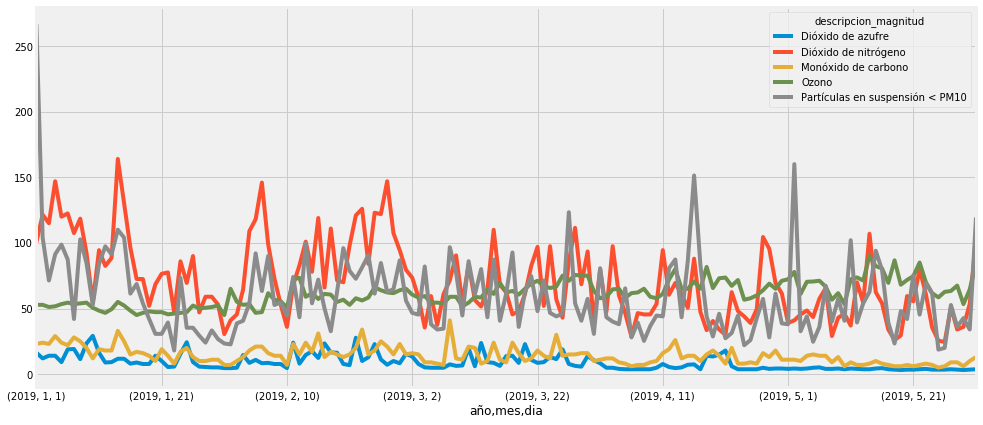

In [18]:
# Suma de ICA agrupado por Hora y Magnitudes 
fig, ax = plt.subplots(figsize=(15,7))
datos_filtrados2019.groupby(['año','mes','dia','descripcion_magnitud']).max()['ica_parcial'].unstack().plot(ax=ax)

In [19]:
#Datos 2020
datos_filtrados2020 =datos_filtrados[datos_filtrados['año'] == 2020]

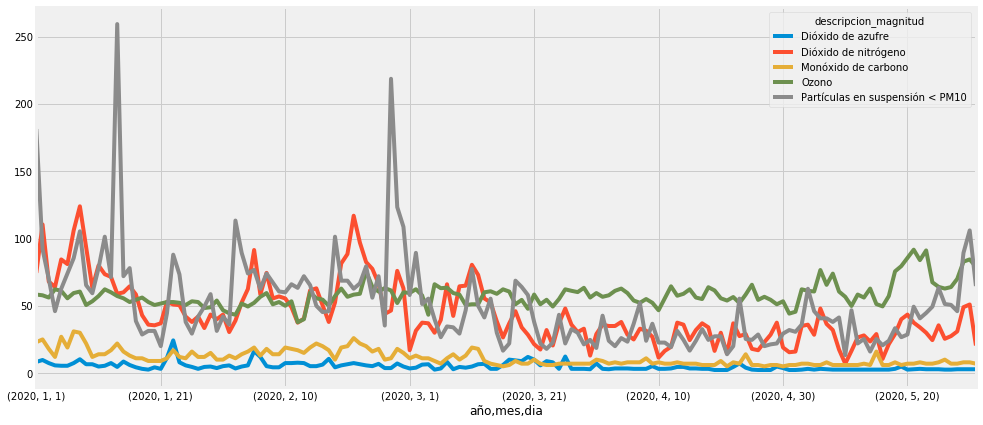

In [20]:
# Suma de ICA agrupado por Hora y Magnitudes 
fig, ax = plt.subplots(figsize=(15,7))
datos_filtrados2020.groupby(['año','mes','dia','descripcion_magnitud']).max()['ica_parcial'].unstack().plot(ax=ax)

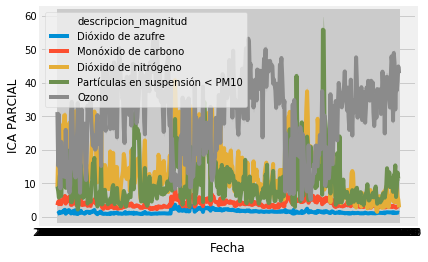

In [21]:
ax = sns.lineplot(x = 'fecha', y = 'ica_parcial', hue = 'descripcion_magnitud', data = datos_filtrados)
ax.set(xlabel = 'Fecha', ylabel='ICA PARCIAL')
plt.show()

Dióxido de nitrógeno               512361
Ozono                              408595
Partículas en suspensión < PM10    332957
Monóxido de carbono                170793
Dióxido de azufre                  170672
Name: descripcion_magnitud, dtype: int64


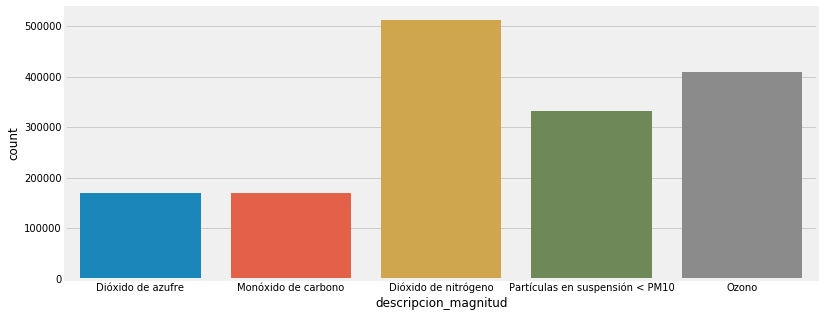

Dióxido de nitrógeno               168924
Ozono                              136069
Partículas en suspensión < PM10    107506
Dióxido de azufre                   57456
Monóxido de carbono                 57437
Name: descripcion_magnitud, dtype: int64


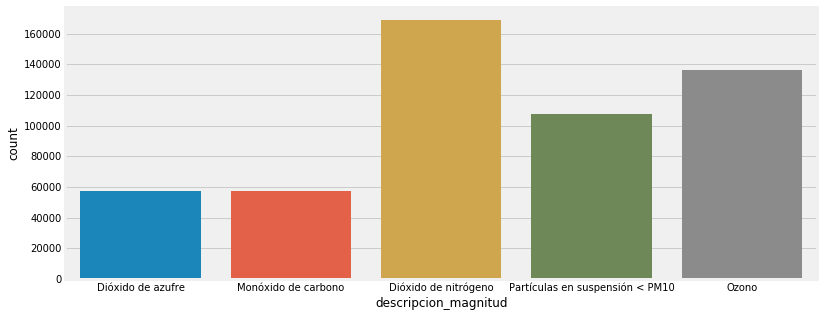

Dióxido de nitrógeno               172202
Ozono                              136064
Partículas en suspensión < PM10    110710
Monóxido de carbono                 57496
Dióxido de azufre                   57484
Name: descripcion_magnitud, dtype: int64


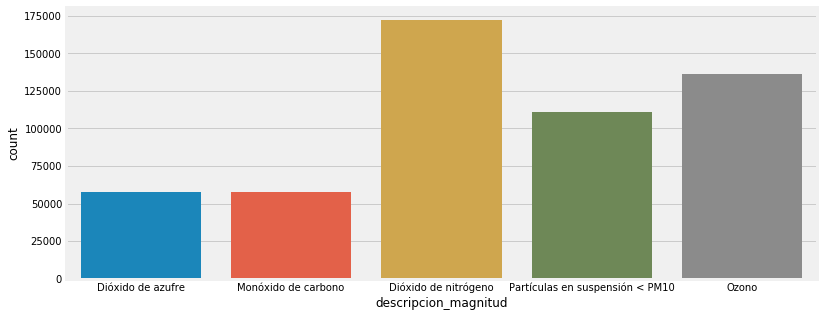

Dióxido de nitrógeno               171235
Ozono                              136462
Partículas en suspensión < PM10    114741
Monóxido de carbono                 55860
Dióxido de azufre                   55732
Name: descripcion_magnitud, dtype: int64


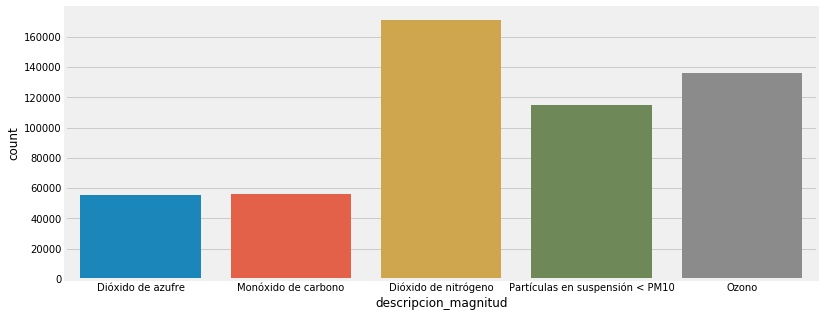

In [22]:
print(datos_filtrados['descripcion_magnitud'].value_counts())
plt.figure(figsize=(12,5))
sns.countplot(datos_filtrados['descripcion_magnitud'])
plt.show()
print(datos_filtrados2018['descripcion_magnitud'].value_counts())
plt.figure(figsize=(12,5))
sns.countplot(datos_filtrados2018['descripcion_magnitud'])
plt.show()
print(datos_filtrados2019['descripcion_magnitud'].value_counts())
plt.figure(figsize=(12,5))
sns.countplot(datos_filtrados2019['descripcion_magnitud'])
plt.show()
print(datos_filtrados2020['descripcion_magnitud'].value_counts())
plt.figure(figsize=(12,5))
sns.countplot(datos_filtrados2020['descripcion_magnitud'])
plt.show()


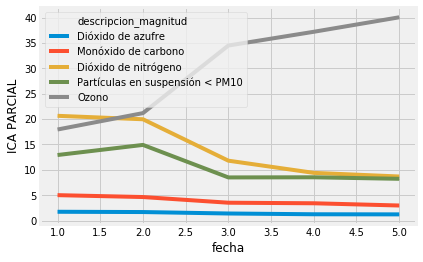

In [23]:
#fig, ax = plt.subplots(figsize=(15,7))
#datos_filtrados.groupby(['hora','descripcion_magnitud']).sum()['ica_parcial'].unstack().plot(ax=ax)

# Valor ICA por Magnitudes
ax = sns.lineplot(x = 'mes', y = 'ica_parcial', hue ='descripcion_magnitud' ,data = datos_filtrados)
ax.set(xlabel = 'fecha', ylabel='ICA PARCIAL')
plt.show()

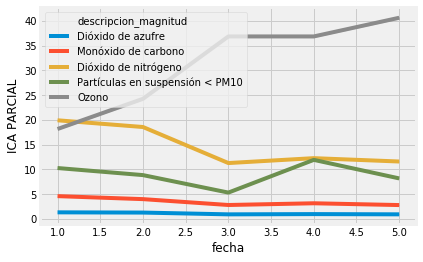

In [24]:
#fig, ax = plt.subplots(figsize=(15,7))
#datos_filtrados.groupby(['hora','descripcion_magnitud']).sum()['ica_parcial'].unstack().plot(ax=ax)

# Valor ICA por Magnitudes
ax = sns.lineplot(x = 'mes', y = 'ica_parcial', hue ='descripcion_magnitud' ,data = datos_filtrados2018)
ax.set(xlabel = 'fecha', ylabel='ICA PARCIAL')
plt.show()

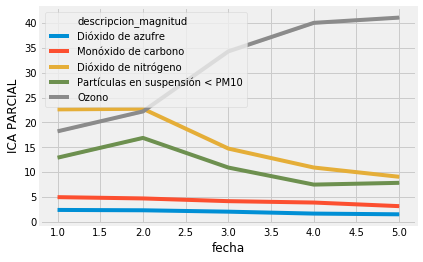

In [25]:
#fig, ax = plt.subplots(figsize=(15,7))
#datos_filtrados.groupby(['hora','descripcion_magnitud']).sum()['ica_parcial'].unstack().plot(ax=ax)

# Valor ICA por Magnitudes
ax = sns.lineplot(x = 'mes', y = 'ica_parcial', hue ='descripcion_magnitud' ,data = datos_filtrados2019)
ax.set(xlabel = 'fecha', ylabel='ICA PARCIAL')
plt.show()

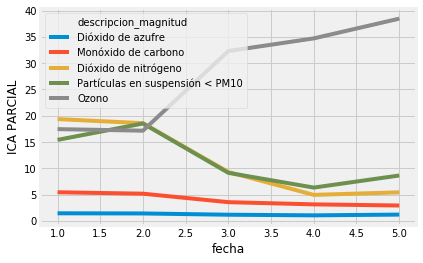

In [26]:
#fig, ax = plt.subplots(figsize=(15,7))
#datos_filtrados.groupby(['hora','descripcion_magnitud']).sum()['ica_parcial'].unstack().plot(ax=ax)

# Valor ICA por Magnitudes
ax = sns.lineplot(x = 'mes', y = 'ica_parcial', hue ='descripcion_magnitud' ,data = datos_filtrados2020)
ax.set(xlabel = 'fecha', ylabel='ICA PARCIAL')
plt.show()

**ICA**   CALIDAD DEL AIRE Índice de Calidad del Aire(µg/m3 )


